# **Libraries**

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Dataset , it's cleaning and analysis**

In [67]:
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [68]:
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df
# ham = 0 , spam = 1

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [70]:
df.shape

(5572, 2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [72]:
df.isnull().sum()

,0
Category,0
Message,0


In [73]:
df.duplicated().sum()

403

In [74]:
df = df.drop_duplicates(keep="first")

In [75]:
df.shape

(5169, 2)

In [76]:
df["Category"].value_counts()

,count
Category,
0,4516
1,653


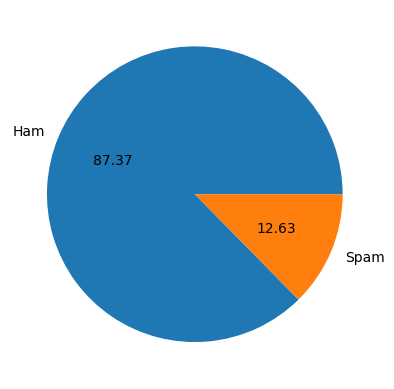

In [77]:
plt.pie(df["Category"].value_counts(),autopct = "%.2f",labels=['Ham','Spam'])
plt.show()

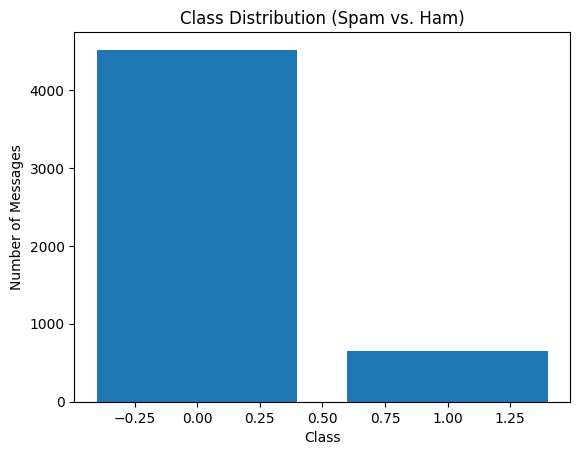

In [78]:
class_counts = df['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()

In [79]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Message:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600,background_color ='#f8f8ff', stopwords = stopwords, min_font_size = 10).generate(comment_words)

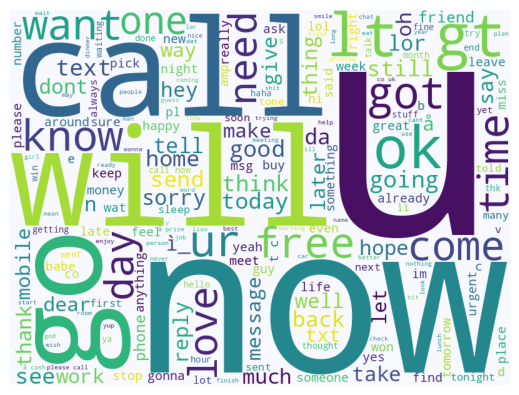

In [80]:
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **Model Training**

In [81]:
x = df['Message']

In [82]:
y = df["Category"]

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [86]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


# **Prediction with custom words**

In [89]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [90]:
custom_word = "Offer for internship"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'Offer for internship' is predicted as: Spam
